In [130]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )

In [132]:
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)

In [133]:
sms_raw.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
sms_raw.columns = ['spam','message']

In [135]:
sms_raw.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# VERSION 1:

In [136]:
keywords = ['click','winner','Free']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains('' + str(key) + '',case=False)

In [137]:
sms_raw.head()

,spam,message,click,winner,Free
0,ham,"Go until jurong point, crazy.. Available only ...",False,False,False
1,ham,Ok lar... Joking wif u oni...,False,False,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,True
3,ham,U dun say so early hor... U c already then say...,False,False,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",False,False,False


In [138]:
sms_raw['spam'] = (sms_raw['spam'] =='spam')

In [139]:
sms_raw.head()

,spam,message,click,winner,Free
0,False,"Go until jurong point, crazy.. Available only ...",False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,True
3,False,U dun say so early hor... U c already then say...,False,False,False
4,False,"Nah I don't think he goes to usf, he lives aro...",False,False,False


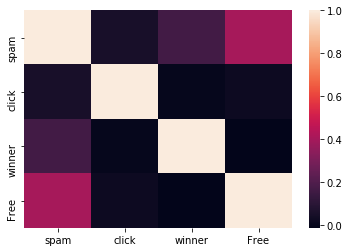

In [140]:
sns.heatmap(sms_raw.corr())

The words show independence which is good.

In [141]:
data = sms_raw[keywords]

target = sms_raw['spam']

In [142]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 590


In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout:' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample:' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout:0.8905829596412556
Testing on Sample:0.8941134242641781


In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.90681004, 0.88172043, 0.90501792, 0.89964158, 0.90143369,
       0.88509874, 0.88150808, 0.89028777, 0.89028777, 0.89388489])

# VERSION 2:

In [145]:
keywords = ['Free','click','OFFER','winner','offer','FREE']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains('' + str(key) + '',case=False)

In [146]:
sms_raw.head()

,spam,message,click,winner,Free,OFFER,offer,FREE
0,False,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,True,False,False,True
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False
4,False,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False


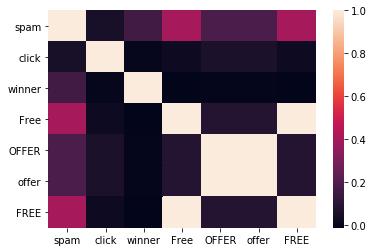

In [147]:
sns.heatmap(sms_raw.corr())

In [148]:
data = sms_raw[keywords]

target = sms_raw['spam']

In [149]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 572


In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout:' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample:' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout:0.8932735426008969
Testing on Sample:0.8973438621679828


In [151]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.90322581, 0.89426523, 0.90681004, 0.90322581, 0.90322581,
       0.89048474, 0.88689408, 0.89388489, 0.89208633, 0.89568345])

# VERSION 3:

In [161]:
sms_raw['all_caps'] = sms_raw.message.str.isupper()

In [162]:
keywords = ['Free','click','OFFER','offer','FREE','winner']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains('' + str(key) + '',case=False)

In [163]:
sms_raw.head()

,spam,message,click,winner,Free,OFFER,offer,FREE,all_caps
0,False,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,True,False,False,True,False
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False
4,False,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False


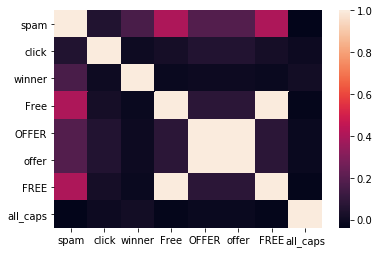

In [164]:
sns.heatmap(sms_raw.corr())

In [167]:
data = sms_raw[keywords + ['all_caps'] ]

target = sms_raw['spam']

In [168]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 572


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout:' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample:' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout:0.8932735426008969
Testing on Sample:0.8973438621679828


In [170]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.90322581, 0.89426523, 0.90681004, 0.90322581, 0.90322581,
       0.89048474, 0.88689408, 0.89388489, 0.89208633, 0.89568345])